## Customer Churn

- Che cosa è la *custumer churn*?
- Come può essere utile il machine-learning?


**Analisi di un caso reale**:  Telco custumer churn

- Telco_customer_churn.csv

Definire il problema di apprendimento e condurre un esperimento (dalla preparazione dei dati alla valutazione del modello). Convincere il cliente a comprare il modello ottenuto.

- Che cosa è la *custumer churn*?

1) 
La customer churn è il tasso di abbandono dei clienti misurato in un determinato frangente di tempo. 
Viene calcolato come il numero di clienti persi fratto il numero di clienti iniziali nel determinato periodo di tempo.

- Come può essere utile il machine-learning?

2) Il machine-learning può aiutare a capire l'impatto che i nuovi prodotti possono apportare all'azienda come incremento di clienti e mantenimento dei vecchi clienti acquisiti. Comprendere quindi, sotto quli condizione e secondo quali criteri dei clienti tenderanno a non rescindere il contratto e portare più margine alla compania. 
Può essere visto come un problema di classificazione con supervised learning

<h1>Indice degli argomenti<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analisi-del-data-set-e-definizione-del-modello-predittivo" data-toc-modified-id="Analisi-del-data-set-e-definizione-del-modello-predittivo"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analisi del data set e definizione del modello predittivo</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Cleaning-e-Encoding" data-toc-modified-id="Data-Cleaning-e-Encoding"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning e Encoding</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Confronto-Modelli" data-toc-modified-id="Confronto-Modelli"><span class="toc-item-num">5&nbsp;&nbsp;</span>Confronto Modelli</a></span></li><li><span><a href="#Ottimizzazione-Iperparametri" data-toc-modified-id="Ottimizzazione-Iperparametri"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ottimizzazione Iperparametri</a></span></li><li><span><a href="#Resampling" data-toc-modified-id="Resampling"><span class="toc-item-num">7&nbsp;&nbsp;</span>Resampling</a></span></li><li><span><a href="#Conclusioni" data-toc-modified-id="Conclusioni"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusioni</a></span></li></ul></div>

# Analisi del data set e definizione del modello predittivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("Telco_customer_churn.csv")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data.City.value_counts()

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

# EDA

C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


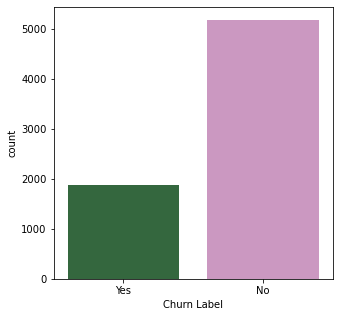

In [5]:
#Avendo deciso di analizzare una problema di classificazione, è importante capire quale sia la variabile da predire
#ovvero se un cliente rescinderà il contratto o meno, nella fattispecie la variabile "Churn Label".

plt.figure(figsize=(5,5))
sns.countplot(data['Churn Label'], palette='cubehelix')
plt.show()

In [6]:
#rinomino delle colonne per una fruibilità maggiore
data.rename(columns = {'Senior Citizen':'Senior_Citizen'}, inplace = True)
data.rename(columns = {'Tech Support':'Tech_Support'}, inplace = True)
data.rename(columns = {'Payment Method':'Payment_Method'}, inplace = True)
data.rename(columns = {'Internet Service':'Internet_Service'}, inplace = True)

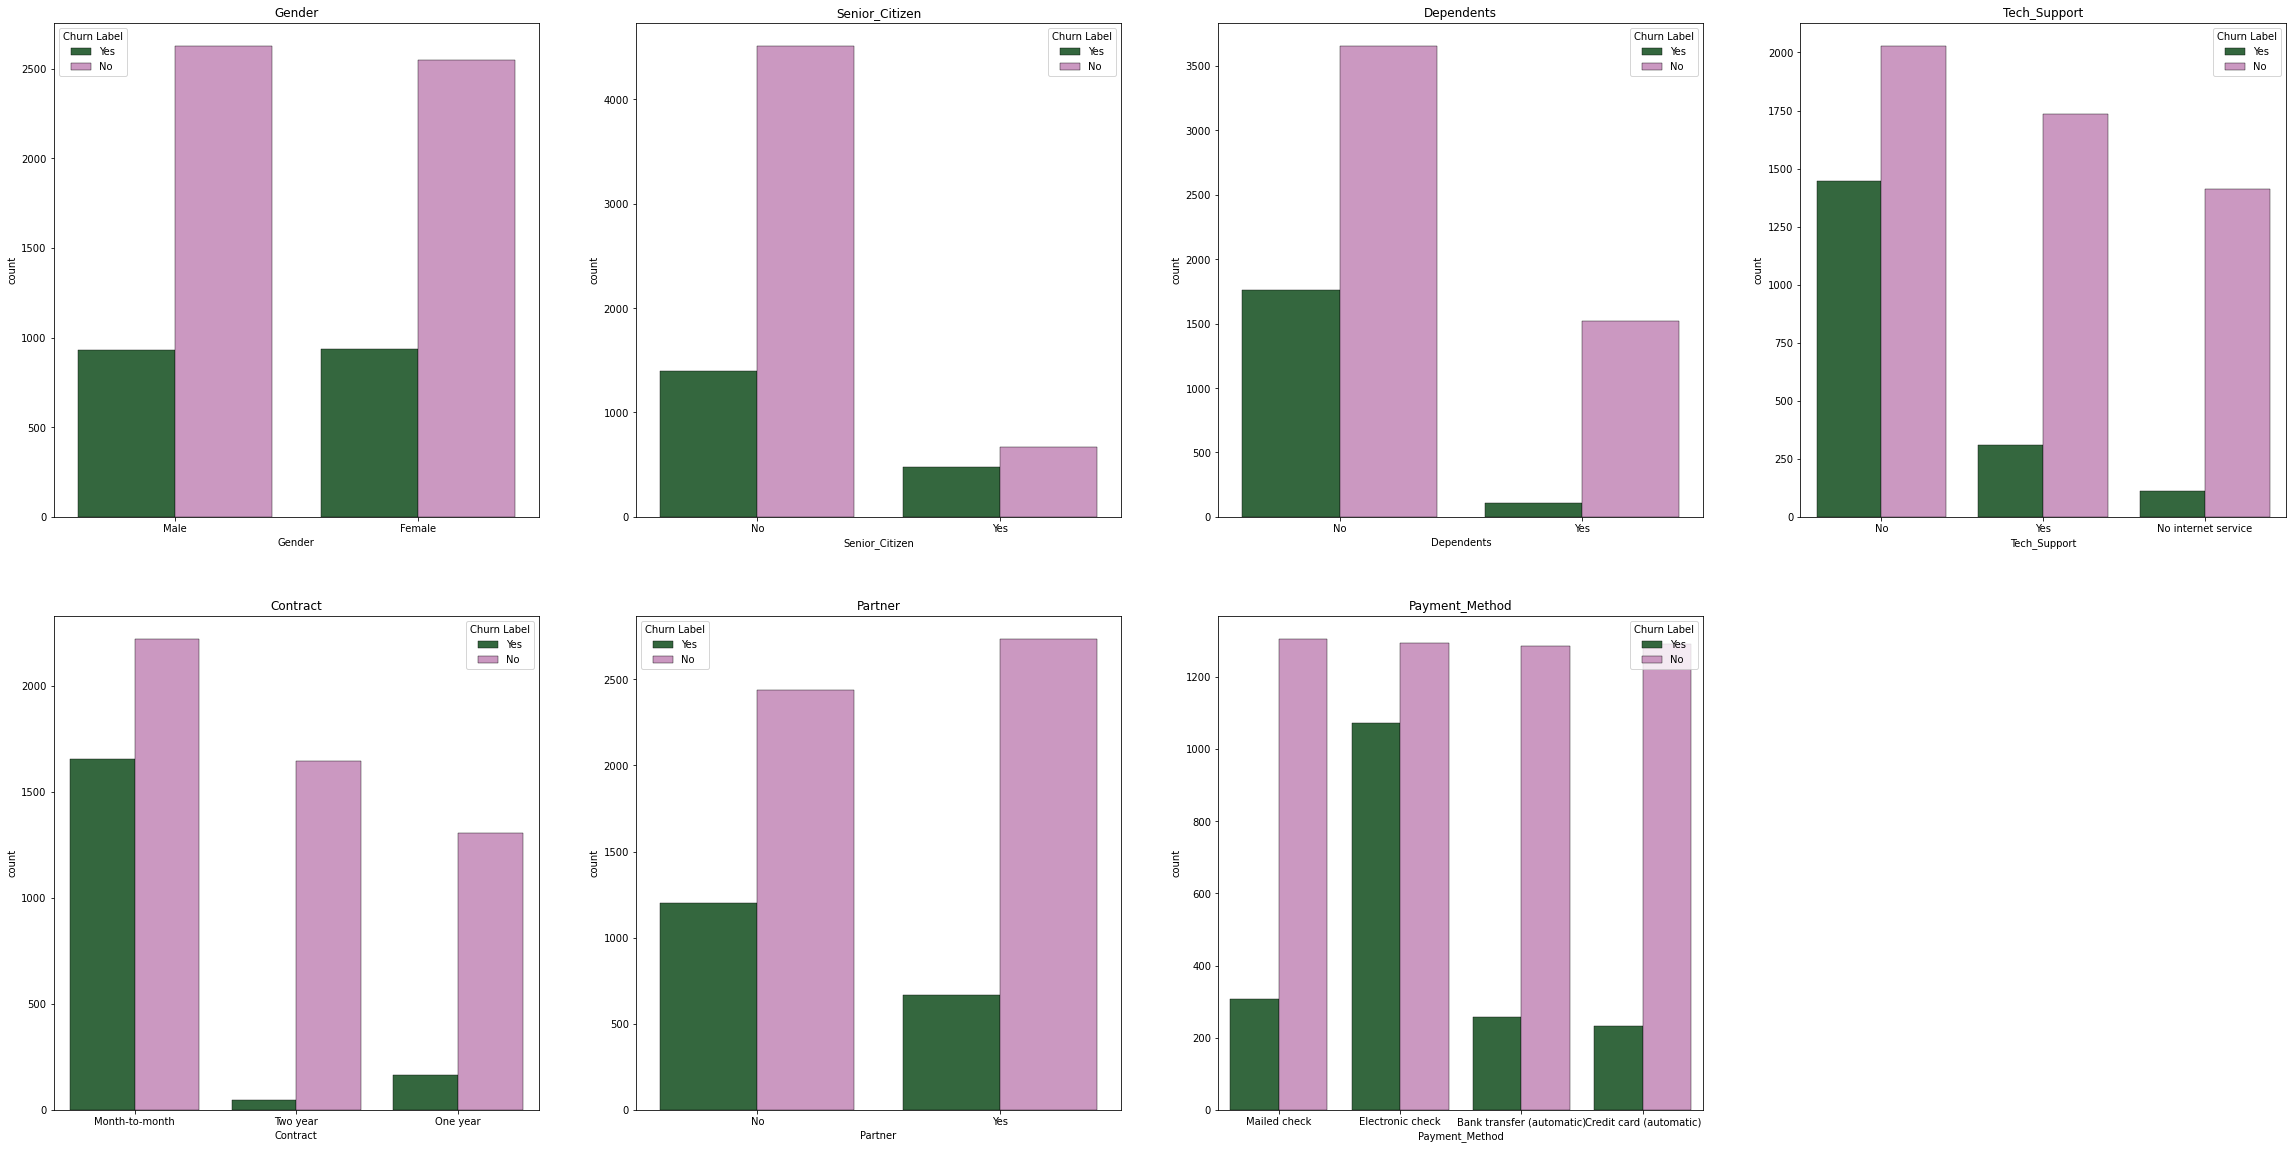

In [7]:
#avendo visto la distribuzione per le due classi, possiamo andare a indagare meglio il nostro set di dati
#creo una funzione che genera dei grafici che contano il numero di samples di ogni categoria in base al churn label

plots={1:[111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224], 5:[231,232,233,234,235],
      6:[231,232,233,234,235,236], 7:[241,242,243,244,245,246,247]}

def countplot(x,y,df):
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(10*columns, 10* rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax=sns.countplot(x=j, hue=x, data=df, palette ='cubehelix', linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()


countplot("Churn Label", ['Gender','Senior_Citizen','Dependents','Tech_Support','Contract','Partner','Payment_Method'], data)


Dall'EDA sembrerebbe che la churn rate possa dipendere da diversi fattori:
1) Se i clienti hanno accesso o meno a supporto tecnico

2) dal tipo di contratto, quello mensile, sembra essere il più penalizzato

3) la tipologia di pagamento più penalizzata sembrerebbe essere quella elettronica

4) Avere già il partner preso una compagnia telefonica non invoglia a cercarne un'altra

## Data Cleaning e Encoding

In [8]:
#data cleaning: eliminiamo le colonne che sono superflue:
#Churn Label
#Churn Score
#Churn Reason
#CLTV
#CustomerID
#Count 

#data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
data_clean= data.drop(['Churn Label','Churn Score', 'Churn Reason','CLTV','CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude'], axis=1)
#data_clean=data_clean.dropna(inplace=True)

In [9]:
#ci facciamo stampare i valori univoci di ogni singola colonna per capire come trattarli
for i in data_clean.columns:
    print(f"Valori unici per {i}:{data_clean[i].nunique()}")
    print(f"{data_clean[i].unique()}\n")

Valori unici per Gender:2
['Male' 'Female']

Valori unici per Senior_Citizen:2
['No' 'Yes']

Valori unici per Partner:2
['No' 'Yes']

Valori unici per Dependents:2
['No' 'Yes']

Valori unici per Tenure Months:73
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Valori unici per Phone Service:2
['Yes' 'No']

Valori unici per Multiple Lines:3
['No' 'Yes' 'No phone service']

Valori unici per Internet_Service:3
['DSL' 'Fiber optic' 'No']

Valori unici per Online Security:3
['Yes' 'No' 'No internet service']

Valori unici per Online Backup:3
['Yes' 'No' 'No internet service']

Valori unici per Device Protection:3
['No' 'Yes' 'No internet service']

Valori unici per Tech_Support:3
['No' 'Yes' 'No internet service']

Valori unici per Streaming TV:3
['No' 'Yes' 'No internet service']

Valori unici per Streaming Movies:3


In [10]:
#Label encoding per le colonne che hanno solo 2 valori
columns_le=['Senior_Citizen','Partner','Dependents','Phone Service','Paperless Billing','Gender']

def label_encoding(column,df):
    for i in column:
        df[i]=df[i].map({'Yes':1,'No':0})
    return
label_encoding(['Senior_Citizen','Partner','Dependents','Phone Service','Paperless Billing'],data_clean)

data_clean['Gender']=data_clean['Gender'].map({'Male':1,'Female':0})

for i in data_clean.columns:
    print(f"Valori unici per {i}:{data_clean[i].nunique()}")
    print(f"{data_clean[i].unique()}\n")
        

Valori unici per Gender:2
[1 0]

Valori unici per Senior_Citizen:2
[0 1]

Valori unici per Partner:2
[0 1]

Valori unici per Dependents:2
[0 1]

Valori unici per Tenure Months:73
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Valori unici per Phone Service:2
[1 0]

Valori unici per Multiple Lines:3
['No' 'Yes' 'No phone service']

Valori unici per Internet_Service:3
['DSL' 'Fiber optic' 'No']

Valori unici per Online Security:3
['Yes' 'No' 'No internet service']

Valori unici per Online Backup:3
['Yes' 'No' 'No internet service']

Valori unici per Device Protection:3
['No' 'Yes' 'No internet service']

Valori unici per Tech_Support:3
['No' 'Yes' 'No internet service']

Valori unici per Streaming TV:3
['No' 'Yes' 'No internet service']

Valori unici per Streaming Movies:3
['No' 'Yes' 'No internet service']

Valo

In [11]:
#OneHotEcoding
columns_ohe=['Multiple Lines','Internet_Service','Online Security','Online Backup','Device Protection','Tech_Support','Streaming TV',
             'Streaming Movies','Contract','Payment_Method']


data_clean= pd.get_dummies(data_clean,columns=columns_ohe)


<AxesSubplot:>

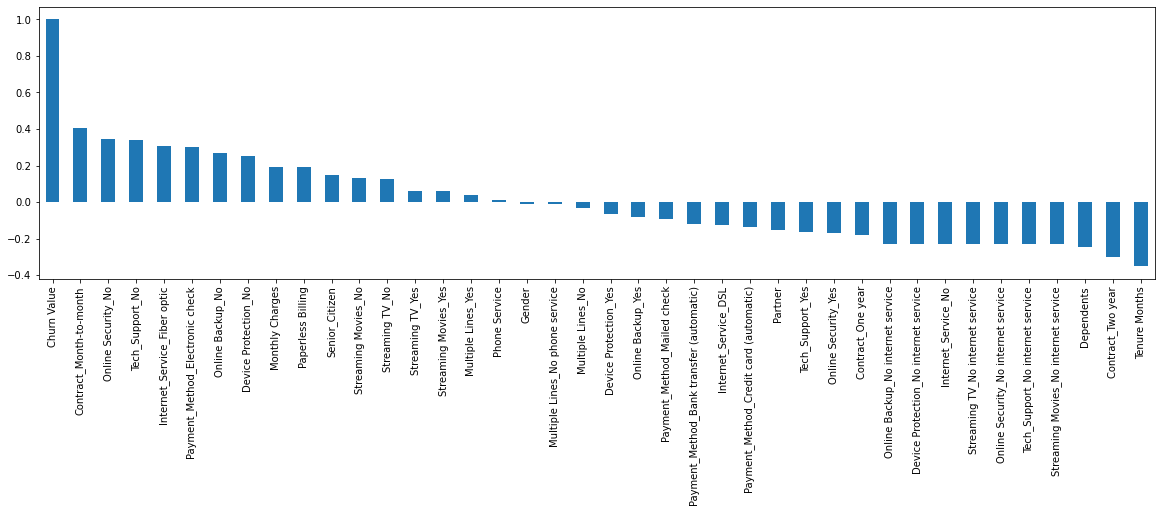

In [12]:
#cerchiamo di capire la correlazione delle diverse variabili con la label Rings
plt.figure(figsize=(16,10))
data_clean.corr()['Churn Value'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

In [13]:
#i valori sulla colonna Total Charges sono delle stringhe quindi eseguo una conversione a numerico prima di applicare 
#il minMaxScaler
data_clean['Total Charges'] = pd.to_numeric(data_clean['Total Charges'],errors = 'coerce')

In [14]:
#eseguiamo il Min-Max Scaler per tutte le colonne numeriche in vista anche dell'algoritmo di classificazione che applicheremo
from sklearn.preprocessing import MinMaxScaler

column_mms=['Tenure Months','Monthly Charges','Total Charges']
df_column_mms=pd.DataFrame(data_clean,columns=column_mms)
df_rest=data_clean.drop(columns=column_mms)

mms=MinMaxScaler()

rescaled=mms.fit_transform(df_column_mms)

df_rescaled=pd.DataFrame(rescaled, columns=column_mms, index=df_rest.index)
data_clean=pd.concat([df_rest,df_rescaled], axis=1)

<AxesSubplot:>

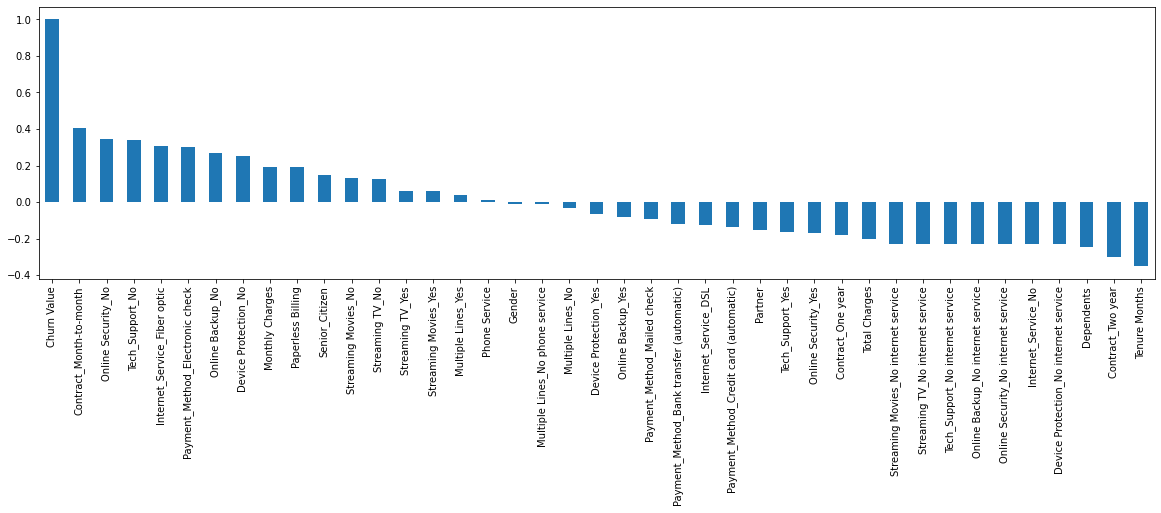

In [15]:
#cerchiamo di capire la correlazione delle diverse variabili con la label Churn Value dopo il min max scaler
plt.figure(figsize=(16,10))
data_clean.corr()['Churn Value'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

In [16]:
data_clean=data_clean.dropna()

## Train Test Split

In [17]:
X1=data_clean.drop(['Churn Value'], axis=1)
X=X1.values

y=data_clean['Churn Value'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#controllo che le dimensioni siano omogenee
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

## Confronto Modelli

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(metric='euclidean')

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred_proba=knn.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1012
           1       0.59      0.55      0.57       395

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.76      0.77      0.76      1407



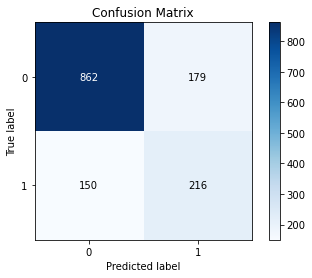

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc, f1_score
import scikitplot as skplt 
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()



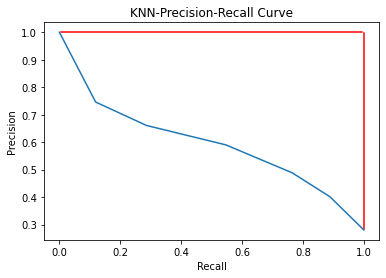

In [20]:
def precision_recall_plot_score(X_test,y_test, y_pred_prob, classifier):
    y_pred_prob=y_pred_prob[:,1]
    precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob)
    
    plt.axhline(y=1, xmin=0.05, xmax=0.95, color='red')
    plt.axvline(x=1, ymin=0.05, ymax=0.95, color='red')
    
    plt.plot(recall,precision,label=f'{classifier}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier}-Precision-Recall Curve')
    plt.show()
    
    

precision_recall_plot_score(X_test,y_test,y_pred_proba, 'KNN')

### Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1012
           1       0.51      0.50      0.51       395

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.72      0.73      0.73      1407



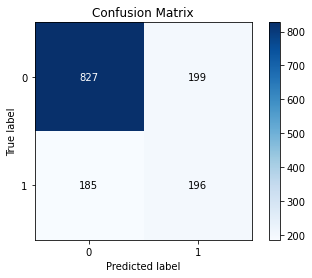

In [21]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_dt_proba=model_dt.predict_proba(X_test)

print(classification_report(y_test, y_pred_dt))

skplt.metrics.plot_confusion_matrix(y_pred_dt,y_test)
plt.show()

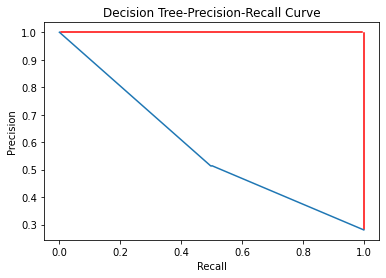

In [22]:
precision_recall_plot_score(X_test,y_test,y_pred_dt_proba, 'Decision Tree')

Poichè il problema di classificazione ha la colonna da predire molto sbilanciata, con un numero molto superiore di istanze negative rispetto a quelle positive, è utile utilizzare la curva di precision-recall perchè i basa sull'analisi della classe inferiore.
Il recall è la possibilità di un modello di rilevare tutti i campioni positivi e la precisione è la capacità di un modello 
di evitare di etichettare campioni negativi come positivi. Come si vede dalla curva, siamo lontani dal desiderato. 
Può dipendere da diversi fattori:

1) dovremmo migliorare il modello ottimizzando l'utilizzo di iperparametri

2) potremmo fare upsampling per la classe minoritaria così da creare un set bilanciato

## Ottimizzazione Iperparametri


### KNN

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,60)}
knn=KNeighborsClassifier(metric='euclidean')
knn_cv=GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(X_train, y_train)

y_pred_opt=knn_cv.predict(X_test)
y_pred_opt_proba=knn_cv.predict_proba(X_test)

print('Miglior numero di neighbors:',knn_cv.best_params_,'\n')

Miglior numero di neighbors: {'n_neighbors': 28} 



              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1012
           1       0.64      0.58      0.61       395

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.79      0.79      1407



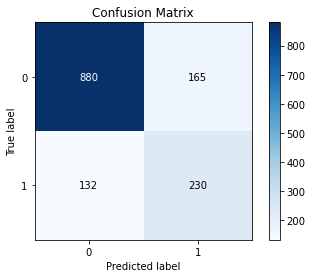

In [24]:

print(classification_report(y_test, y_pred_opt))

skplt.metrics.plot_confusion_matrix(y_pred_opt,y_test)
plt.show()

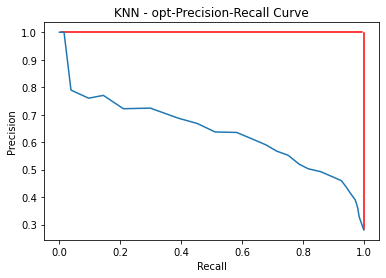

In [25]:
precision_recall_plot_score(X_test,y_test,y_pred_opt_proba, 'KNN - opt')

### Decision Tree

In [27]:
param_grid_dt={'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}
model_dt = DecisionTreeClassifier()
model_dt_cv=GridSearchCV(model_dt,param_grid_dt, cv=5)
model_dt_cv.fit(X_train, y_train)
y_pred_dt_opt = model_dt_cv.predict(X_test)
y_pred_dt_proba_opt=model_dt_cv.predict_proba(X_test)

print('Parametri migliori:',model_dt_cv.best_params_,'\n')


Parametri migliori: {'criterion': 'gini', 'max_depth': 6} 



              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1012
           1       0.66      0.59      0.62       395

    accuracy                           0.80      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.79      0.80      0.79      1407



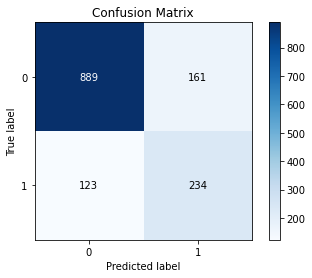

In [28]:
print(classification_report(y_test, y_pred_dt_opt))

skplt.metrics.plot_confusion_matrix(y_pred_dt_opt,y_test)
plt.show()

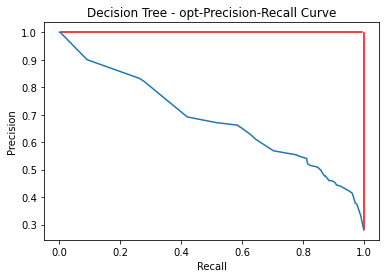

In [29]:
precision_recall_plot_score(X_test,y_test,y_pred_dt_proba_opt, 'Decision Tree - opt')

## Resampling

In [39]:
X_no = data_clean[data_clean['Churn Value'] == 0]
X_yes = data_clean[data_clean['Churn Value'] == 1]

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)

print(len(X_yes_upsampled))


5163


C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

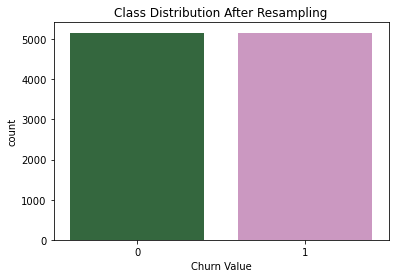

In [40]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn Value', data=X_upsampled, palette ='cubehelix' ).set_title('Class Distribution After Resampling')

In [41]:
X_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    10326 non-null  int64  
 1   Senior_Citizen                            10326 non-null  int64  
 2   Partner                                   10326 non-null  int64  
 3   Dependents                                10326 non-null  int64  
 4   Phone Service                             10326 non-null  int64  
 5   Paperless Billing                         10326 non-null  int64  
 6   Churn Value                               10326 non-null  int64  
 7   Multiple Lines_No                         10326 non-null  uint8  
 8   Multiple Lines_No phone service           10326 non-null  uint8  
 9   Multiple Lines_Yes                        10326 non-null  uint8  
 10  Internet_Service_DSL              

In [42]:
#ci facciamo stampare i valori univoci di ogni singola colonna per capire come trattarli
for i in X_upsampled.columns:
    print(f"Valori unici per {i}:{X_upsampled[i].nunique()}")
    print(f"{X_upsampled[i].unique()}\n")

Valori unici per Gender:2
[0 1]

Valori unici per Senior_Citizen:2
[0 1]

Valori unici per Partner:2
[1 0]

Valori unici per Dependents:2
[0 1]

Valori unici per Phone Service:2
[0 1]

Valori unici per Paperless Billing:2
[1 0]

Valori unici per Churn Value:2
[0 1]

Valori unici per Multiple Lines_No:2
[0 1]

Valori unici per Multiple Lines_No phone service:2
[1 0]

Valori unici per Multiple Lines_Yes:2
[0 1]

Valori unici per Internet_Service_DSL:2
[1 0]

Valori unici per Internet_Service_Fiber optic:2
[0 1]

Valori unici per Internet_Service_No:2
[0 1]

Valori unici per Online Security_No:2
[1 0]

Valori unici per Online Security_No internet service:2
[0 1]

Valori unici per Online Security_Yes:2
[0 1]

Valori unici per Online Backup_No:2
[0 1]

Valori unici per Online Backup_No internet service:2
[0 1]

Valori unici per Online Backup_Yes:2
[1 0]

Valori unici per Device Protection_No:2
[1 0]

Valori unici per Device Protection_No internet service:2
[0 1]

Valori unici per Device Pro

In [44]:

X1=X_upsampled.drop(['Churn Value'], axis=1)
X=X1.values

y=X_upsampled['Churn Value'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#controllo che le dimensioni siano omogenee
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8260, 40), (2066, 40), (8260,), (2066,))

### KNN

In [45]:
knn=KNeighborsClassifier(metric='euclidean')

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred_proba=knn.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1064
           1       0.73      0.90      0.81      1002

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.81      0.79      0.79      2066



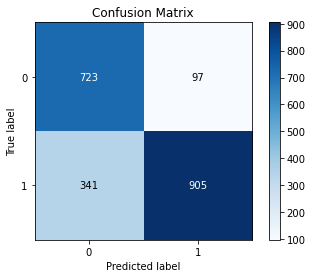

In [46]:
print(classification_report(y_test, y_pred))

skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

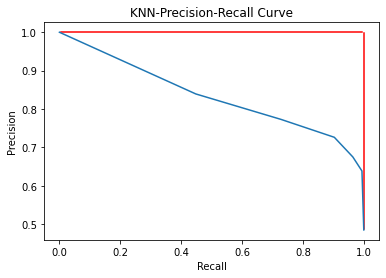

In [47]:
precision_recall_plot_score(X_test,y_test,y_pred_proba, 'KNN')

### Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1064
           1       0.83      0.94      0.88      1002

    accuracy                           0.88      2066
   macro avg       0.88      0.88      0.88      2066
weighted avg       0.88      0.88      0.88      2066



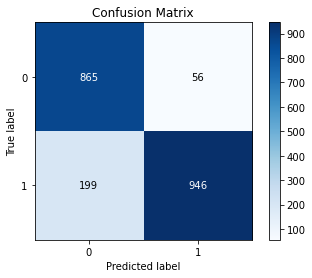

In [48]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_dt_proba=model_dt.predict_proba(X_test)

print(classification_report(y_test, y_pred_dt))

skplt.metrics.plot_confusion_matrix(y_pred_dt,y_test)
plt.show()

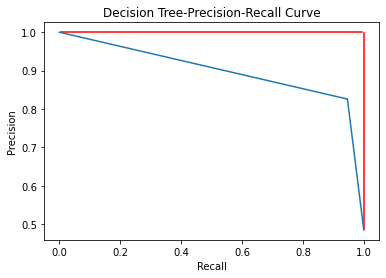

In [49]:
precision_recall_plot_score(X_test,y_test,y_pred_dt_proba, 'Decision Tree')

## Conclusioni

Il modello di classificazione Decision Tree con Resampling ha portato degli ottimi risultati in termini di affidabilità,
che può essere utilizzato per predire se un cliente rimarrà presso una compagnia telefonica o meno.
Dall'EDA abbiamo visto che le caratteristiche per cui si possa decidere di cambiare o meno operatore sono strettamente legate a:
1) la possibilità di avere un supporto tecnico

2) la possibilità di effettuare delle promozioni agevolate per chi ha il proprio partner che già utilizza quell'operatore 
    telefonico

3) la possibilità di effettuare dei contratti più lunghi di quelli mensili, proponendo delle promozioni valide

4) Disincentivare il pagamento con electronic Check trovando soluzioni per incentivare le altre modalità

Importante è il calcolo del Churn rate poichè, anche se si dovessero applicare promozioni atte ottenere un guadagno più basso, la riduzione del tasso di abbandono produrrebbe una marginalità decisamente più alta.


